# Baseball Case Study

*Problem Statement*

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

#### Importing Data set

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


#### Moving output column to the end

In [4]:
w = df['W']
df.drop('W', axis=1, inplace=True)
df['W'] = w
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


## Univariate Analysis

In [9]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the data set.

In [10]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

In [11]:
df.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
W        int64
dtype: object

All variables except Earned Run Average are integers type.

In [12]:
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

<AxesSubplot:>

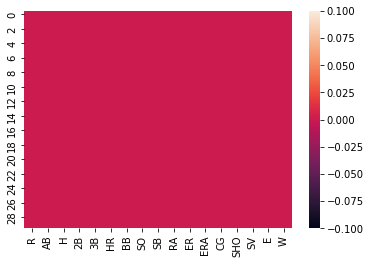

In [13]:
sns.heatmap(df.isnull())

Observation: There are no null values in the data set.

In [14]:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


Observation: There is high standard deviation in every column except ERA and CG. Maximum standard deviation is present in SO and then RA, ER and AB.

There is a big difference between mean and median in SO so there might be some skewness present.

In [15]:
df.nunique()

R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
W      24
dtype: int64

Observation: Most values are non-repeating and unique, meaning they are all numerical and not categorical.

In [16]:
df.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


<AxesSubplot:>

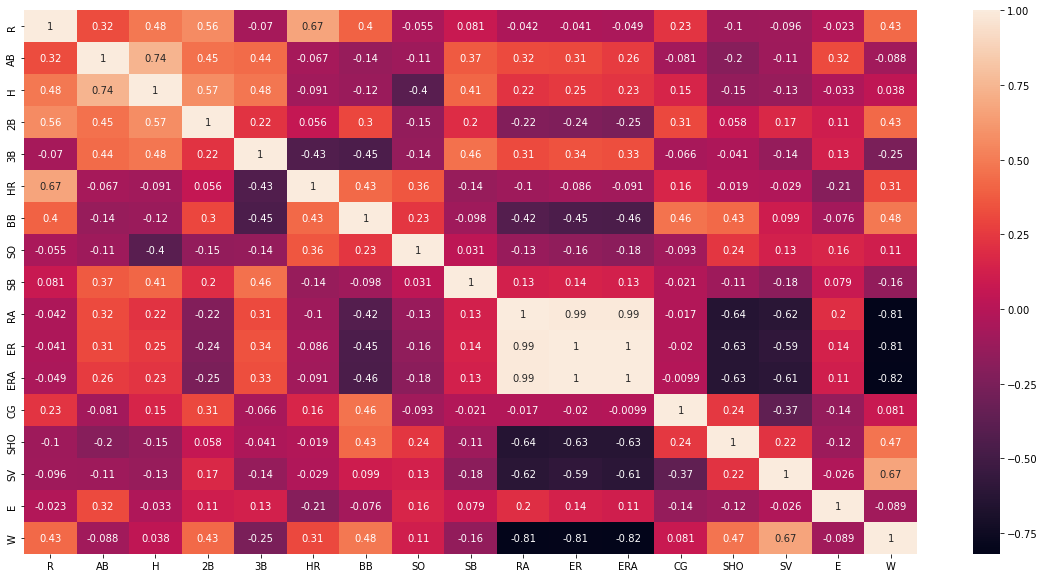

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Observation: There is **extremely** high correlation between RA, ERA and ER. There is high negative correlation of RA, ER and ERA with Wins.
RA, ER and ERA also have high negative correlation with SHO and SV.

In [19]:
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

Observation: There is only skewness in R(Runs).

array([[<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>],
       [<AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>,
        <AxesSubplot:title={'center':'ERA'}>],
       [<AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'W'}>, <AxesSubplot:>]], dtype=object)

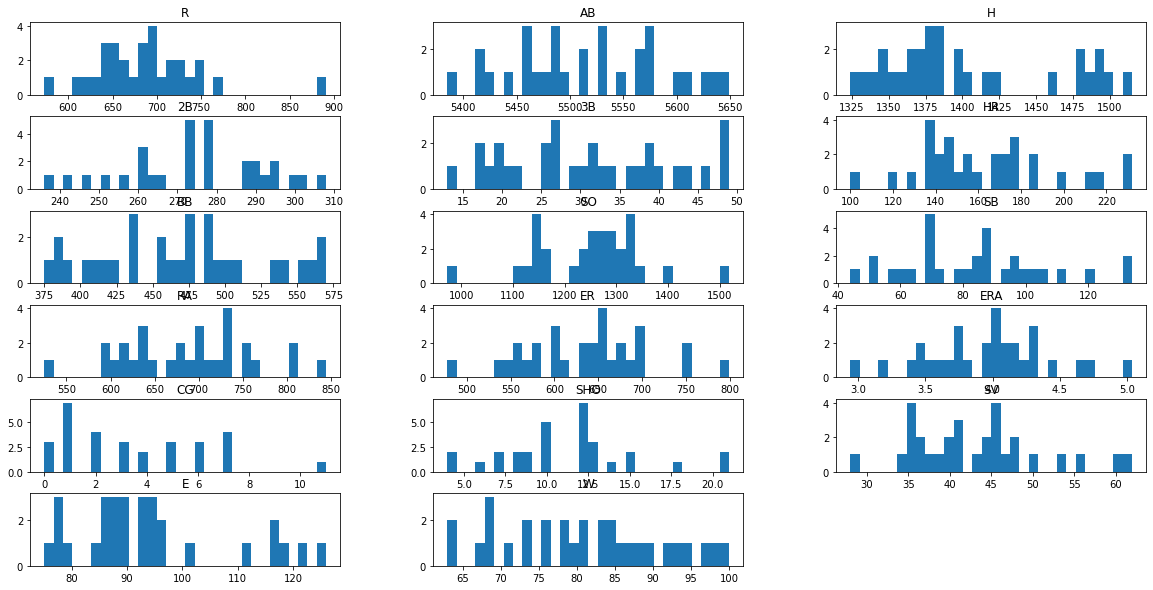

In [21]:
df.hist(figsize=(20,10), grid=False, layout=(6, 3), bins = 30)

Observation: There is very minimal skewness in R, and no skewness in other plot.

Text(0.5, 1.0, 'Runs')

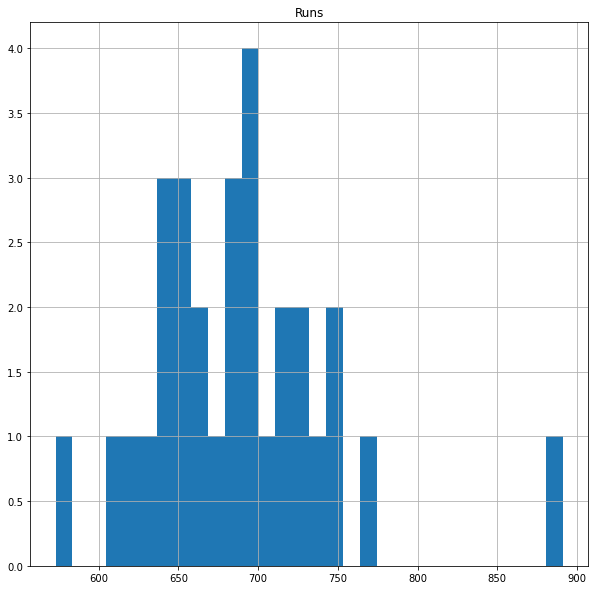

In [22]:
df['R'].hist(figsize=(10,10), bins=30)
plt.title('Runs')

Observation: There is an overall normal distribution with slight right skewness caused by the outlier data on the right.

Text(0.5, 1.0, 'Number of Wins')

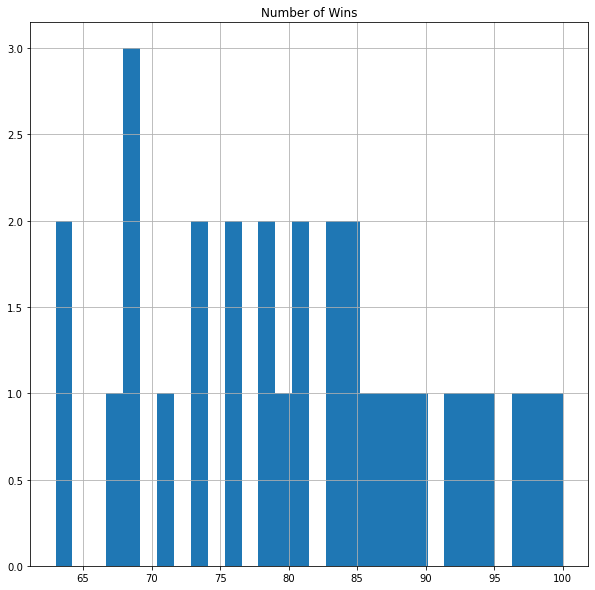

In [23]:
df['W'].hist(figsize=(10,10), bins=30)
plt.title('Number of Wins')

Observation: The target variable W is normally distributed

Text(0.5, 1.0, 'Errors')

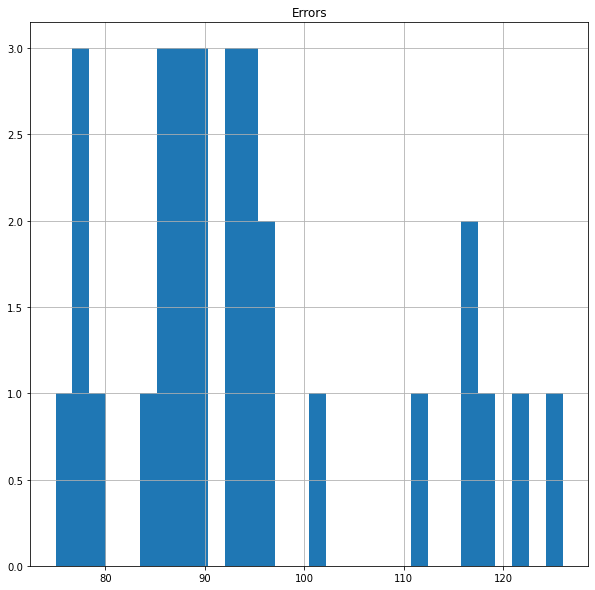

In [24]:
df['E'].hist(figsize=(10,10), bins=30)
plt.title('Errors')

Observation: This plot has 2nd highest skewness value of 0.89, but due to it being less than 1, the distribution is still normal.

Text(0.5, 1.0, 'Complete Games')

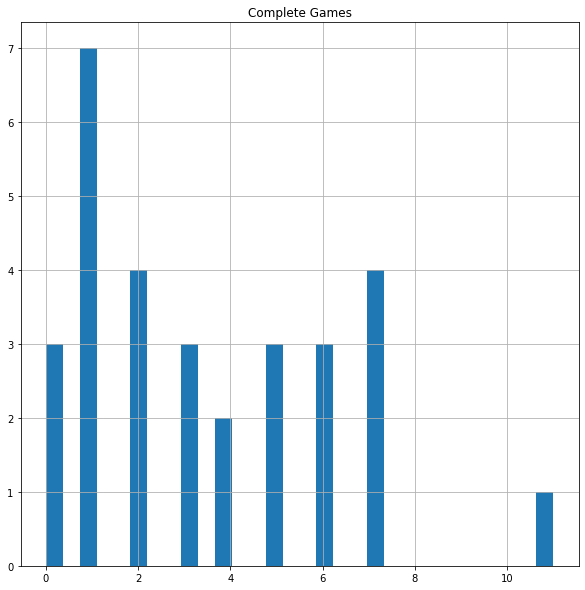

In [25]:
df['CG'].hist(figsize=(10,10), bins=30)
plt.title('Complete Games')

Observation: This plot has 3rd highest skewness value of 0.73, but due to it being less than 1, the distribution is still relatively normal.

Text(0.5, 1.0, 'Outliers in the columns')

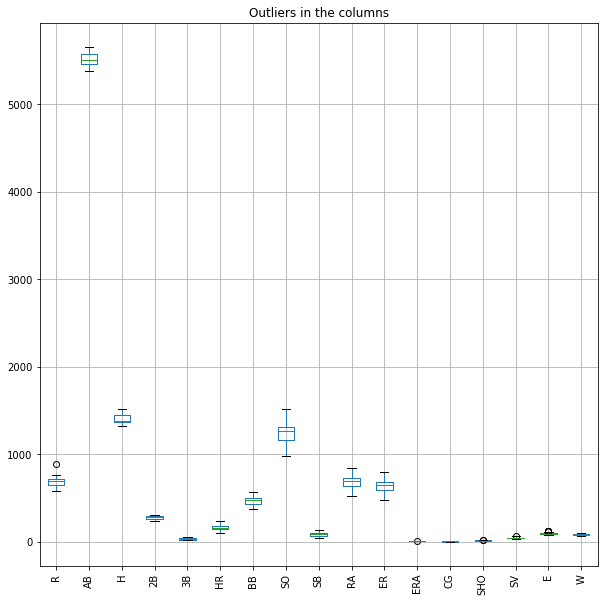

In [26]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Observation: Outliers are present in R (Runs), ERA (Earned Run Average), SHO (Shutouts), SV (Saves), E (Errors).

<AxesSubplot:xlabel='R'>

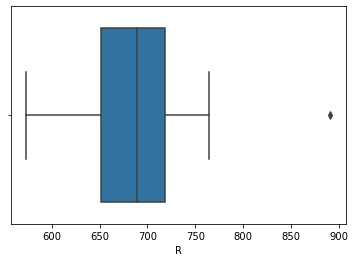

In [12]:
sns.boxplot(df['R'])

Observation: One outlier present in Runs column.

<AxesSubplot:xlabel='ERA'>

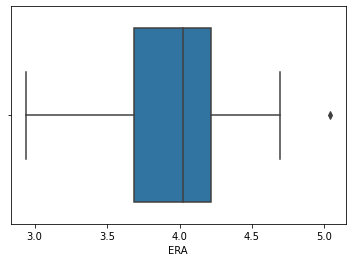

In [13]:
sns.boxplot(df['ERA'])

Observation: One outlier present in ERA column.

<AxesSubplot:xlabel='SHO'>

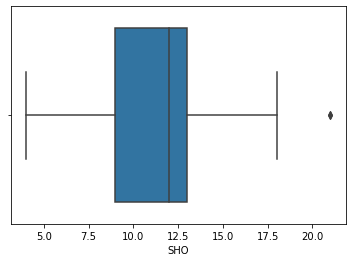

In [14]:
sns.boxplot(df['SHO'])

Observation: 1+ outliers present in SHO column.

<AxesSubplot:xlabel='E'>

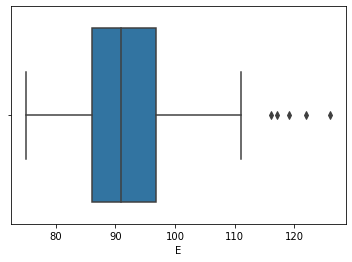

In [15]:
sns.boxplot(df['E'])

Observation: Around 5 outliers present in E (Errors) column

<AxesSubplot:xlabel='W'>

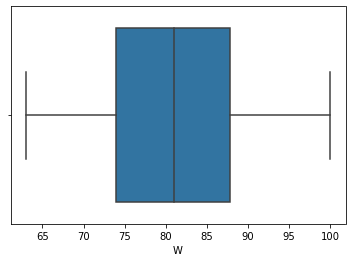

In [16]:
sns.boxplot(df['W'])

Observation: Output column W (Wins) contains no outliers.

<AxesSubplot:ylabel='W'>

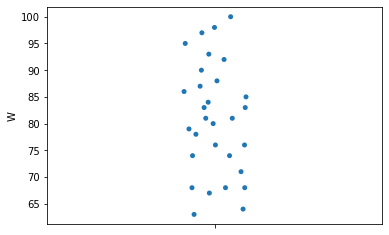

In [10]:
sns.stripplot(y=df['W'])

Observation: There is normal distribution of output variable.

<AxesSubplot:xlabel='W', ylabel='Density'>

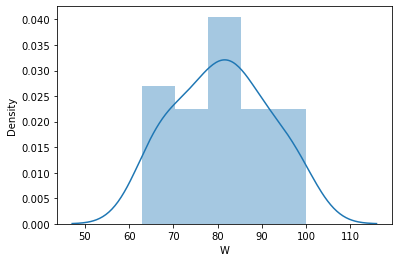

In [11]:
sns.distplot(df['W'])

Observation: There is normal distribution of output variable W.

<AxesSubplot:xlabel='W'>

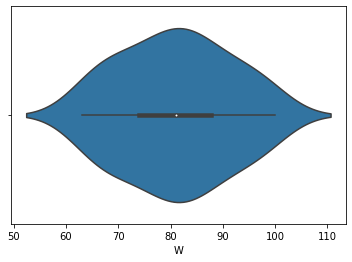

In [17]:
sns.violinplot(df['W'])

Observation: There is normal distribution of the output variable and its mean is at around 81.

## Bivariate analysis

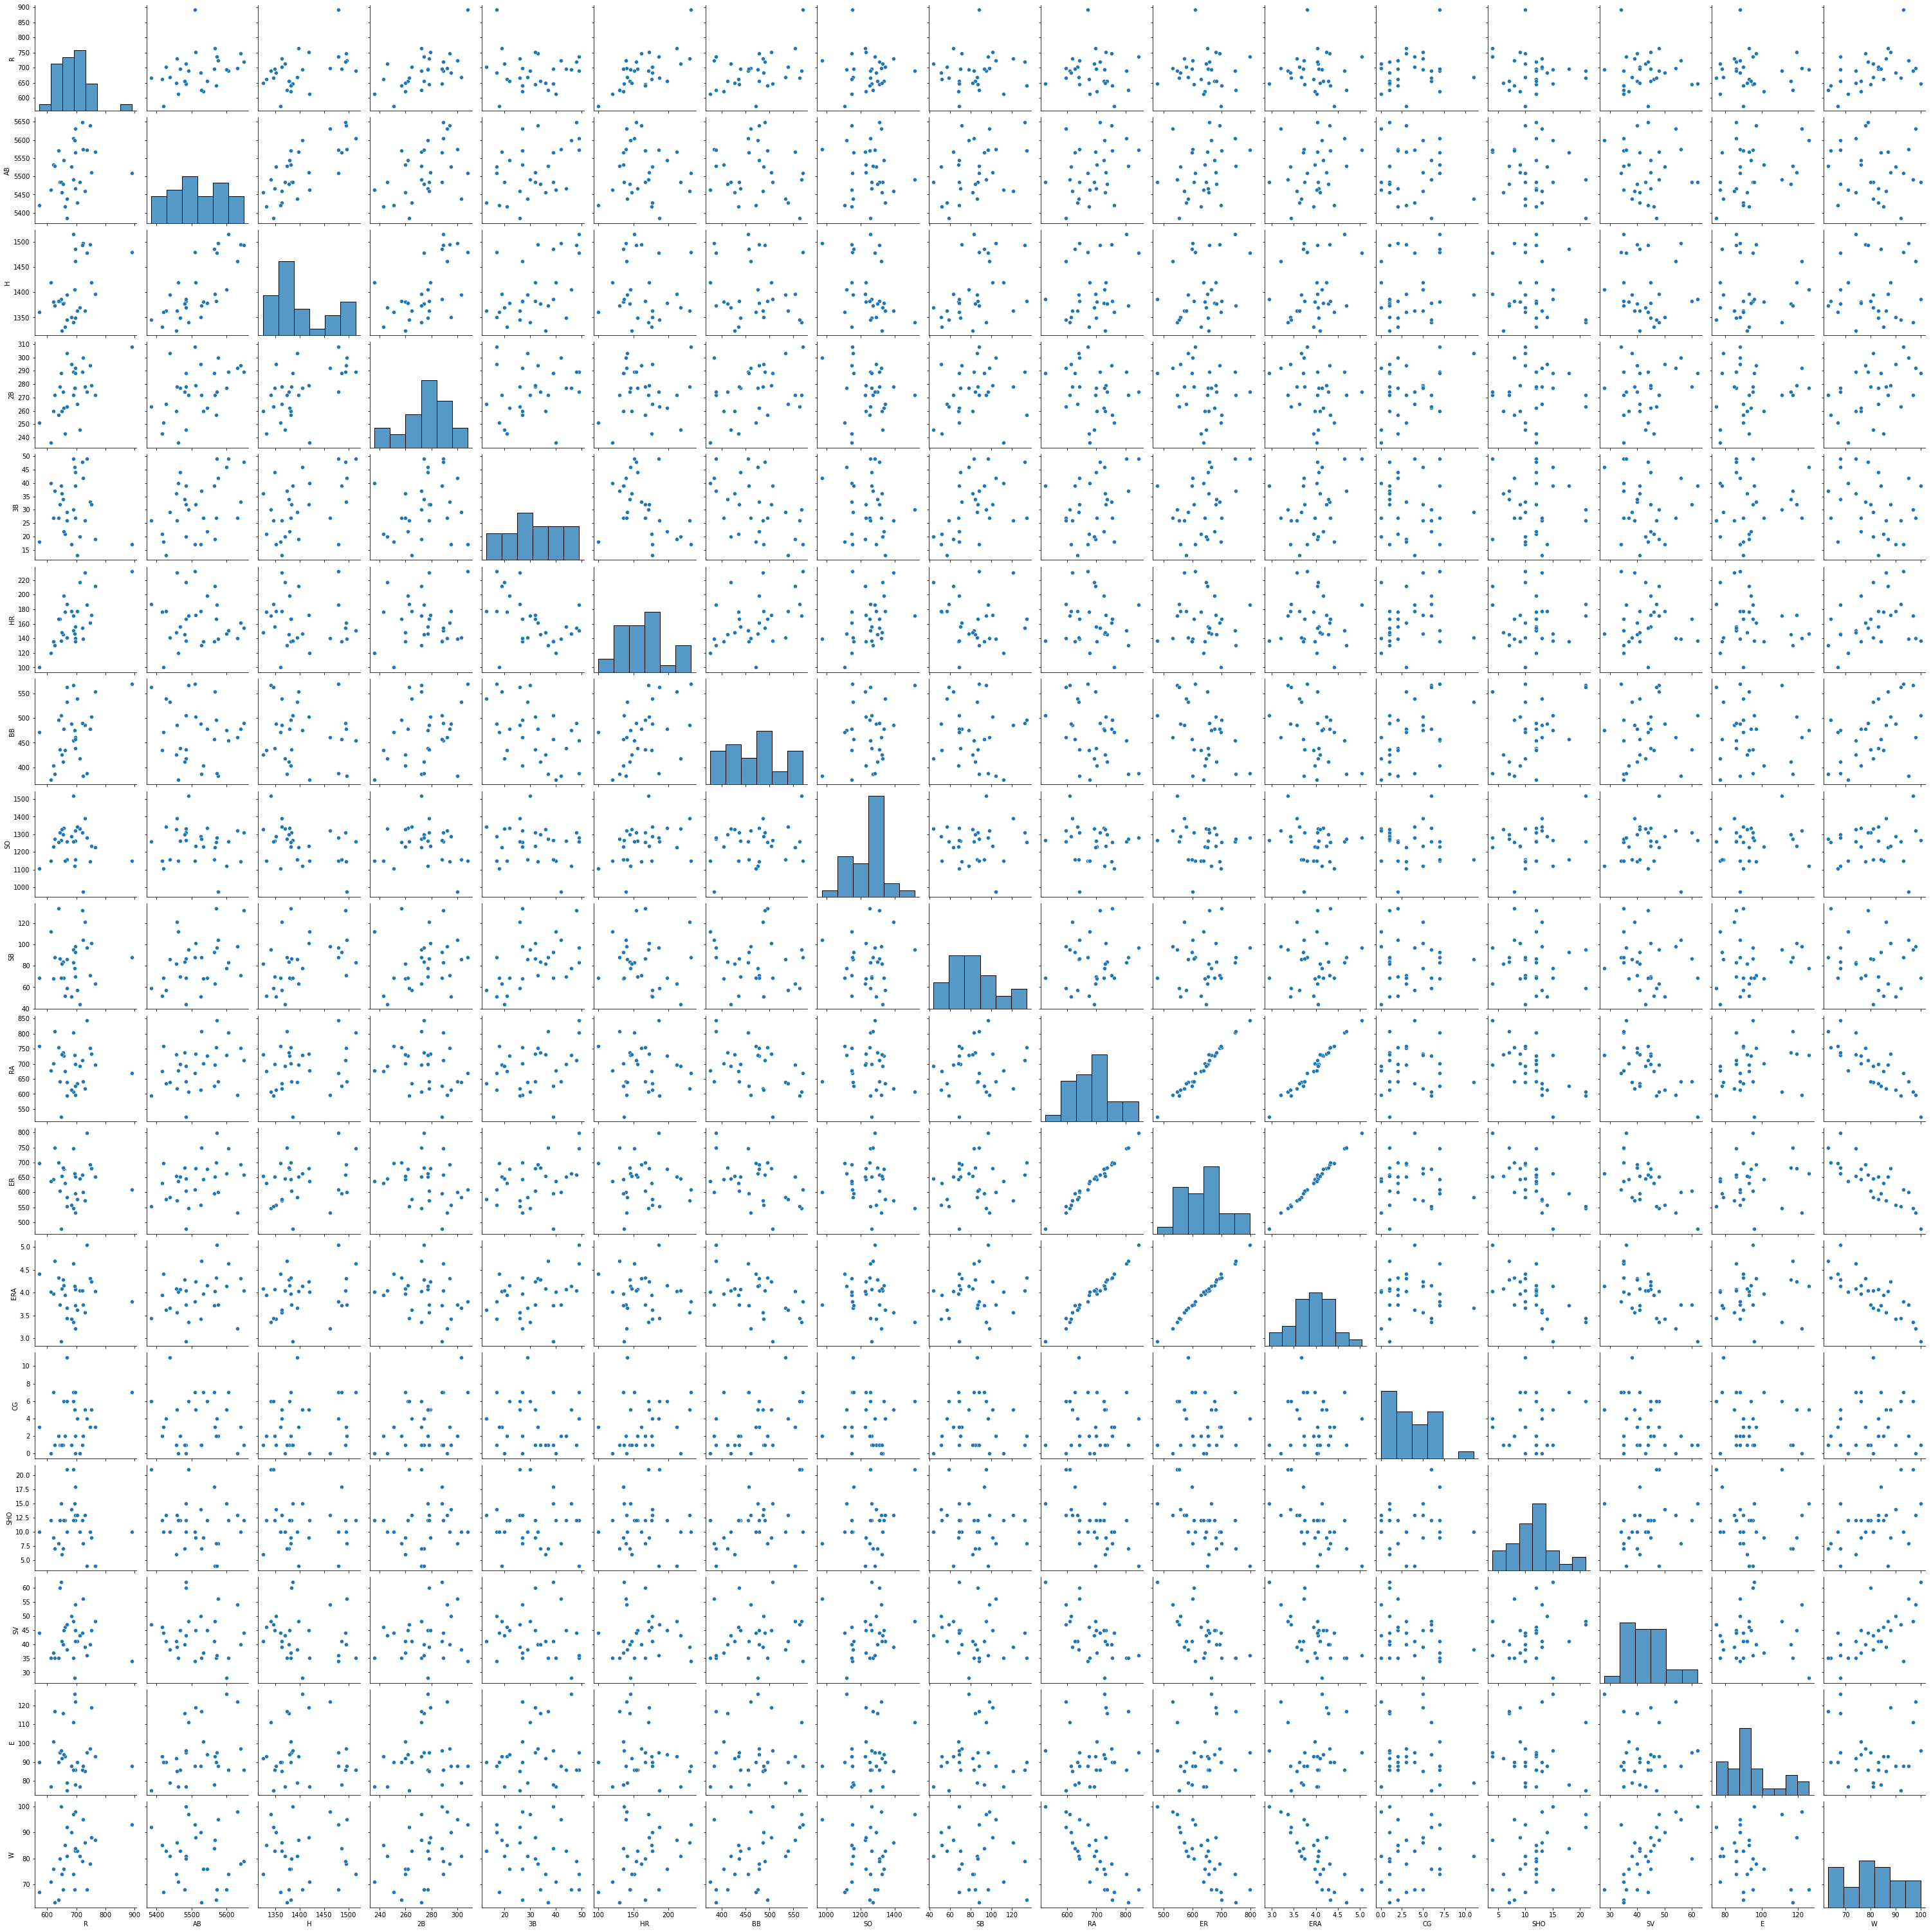

In [25]:
sns.pairplot(df)

Observation: We can clearly spot RA, ER and ERA as they are highest correlated data. All other data are correlated less.

#### Runs and Wins

<AxesSubplot:xlabel='R', ylabel='W'>

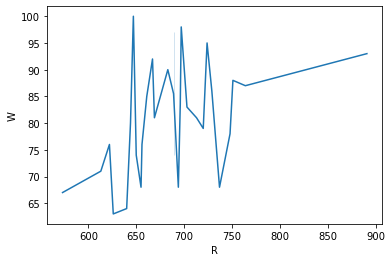

In [18]:
sns.lineplot(df['R'],df['W'])

Observation: They are positively correlated. The higher the runs the greater the win number, with a few exceptions in the middle.

<AxesSubplot:xlabel='R', ylabel='W'>

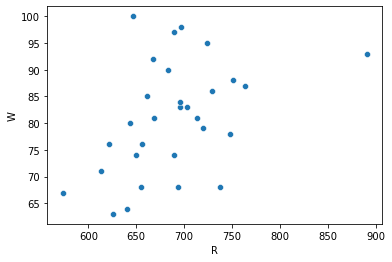

In [19]:
sns.scatterplot(df['R'], df['W'])

Observation: Overall positive correlation between the data.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '573'),
  Text(1, 0, '613'),
  Text(2, 0, '622'),
  Text(3, 0, '626'),
  Text(4, 0, '640'),
  Text(5, 0, '644'),
  Text(6, 0, '647'),
  Text(7, 0, '650'),
  Text(8, 0, '655'),
  Text(9, 0, '656'),
  Text(10, 0, '661'),
  Text(11, 0, '667'),
  Text(12, 0, '669'),
  Text(13, 0, '683'),
  Text(14, 0, '689'),
  Text(15, 0, '694'),
  Text(16, 0, '696'),
  Text(17, 0, '697'),
  Text(18, 0, '703'),
  Text(19, 0, '713'),
  Text(20, 0, '720'),
  Text(21, 0, '724'),
  Text(22, 0, '729'),
  Text(23, 0, '737'),
  Text(24, 0, '748'),
  Text(25, 0, '751'),
  Text(26, 0, '764'),
  Text(27, 0, '891')])

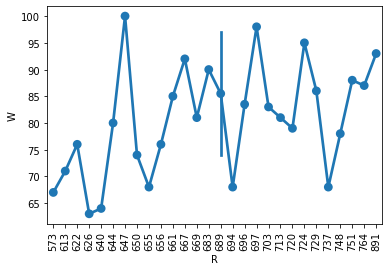

In [21]:
sns.pointplot(x = "R", y = "W", data = df)
plt.xticks(rotation=90)

Observation: Overall positive correlation with a few exceptions, but the trend is upward.

<AxesSubplot:xlabel='R', ylabel='W'>

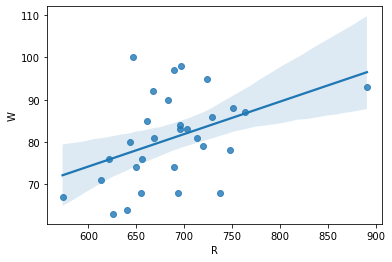

In [26]:
sns.regplot('R','W',df)

Observation: Most data points are close to the best fit line, with the exception of some residuals in the middle.

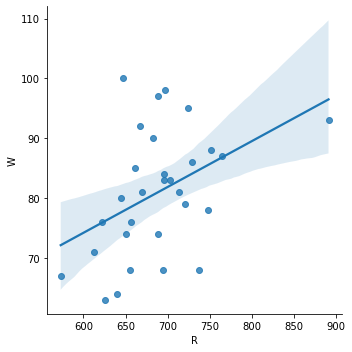

In [27]:
sns.lmplot('R','W',df)

Observation: Most data points are close to the best fit line, with the exception of some residuals in the middle.

#### Saves and Wins

<AxesSubplot:xlabel='SV', ylabel='W'>

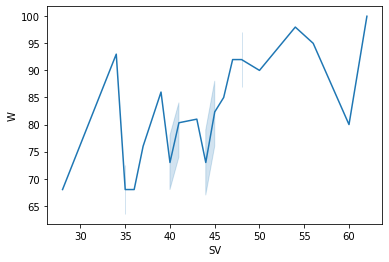

In [23]:
sns.lineplot(df['SV'],df['W'])

Observation: They are positively correlated. The higher the saves the greater the win number, with a few exceptions in the middle.

<AxesSubplot:xlabel='SV', ylabel='W'>

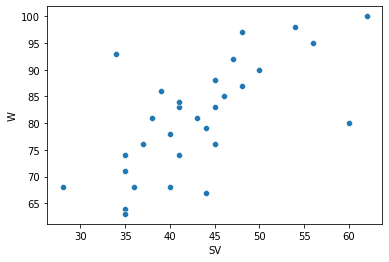

In [22]:
sns.scatterplot(df['SV'], df['W'])

High positive correlation between Saves and Wins.

<AxesSubplot:xlabel='SV', ylabel='W'>

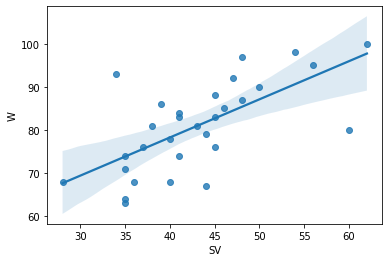

In [28]:
sns.regplot('SV', 'W', df)

Observation: Most data points are close to the best fit line, with the exception of some residuals in the middle.

## Dealing with skewness

In [29]:
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

Observation: R is the only variable with skewness so we will remove it now.

In [31]:
df['R'] = np.log(df['R'])

In [32]:
df.skew()

R      0.744196
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

<AxesSubplot:xlabel='R', ylabel='Count'>

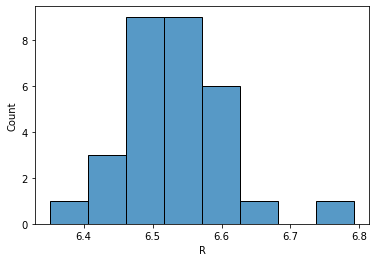

In [33]:
sns.histplot(df['R'])

Observation: There is no more skewness in the data

## Checking multi-collinearity with Variance Inflation Factor

In [34]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [35]:
vif_calc()

,variables,VIF FACTOR
0,R,79573.901979
1,AB,63041.684128
2,H,3439.637553
3,2B,861.103733
4,3B,31.189485
5,HR,225.365446
6,BB,257.474672
7,SO,380.976146
8,SB,28.101343
9,RA,17478.031781


There is **very high** level of multi collinearity.

<AxesSubplot:>

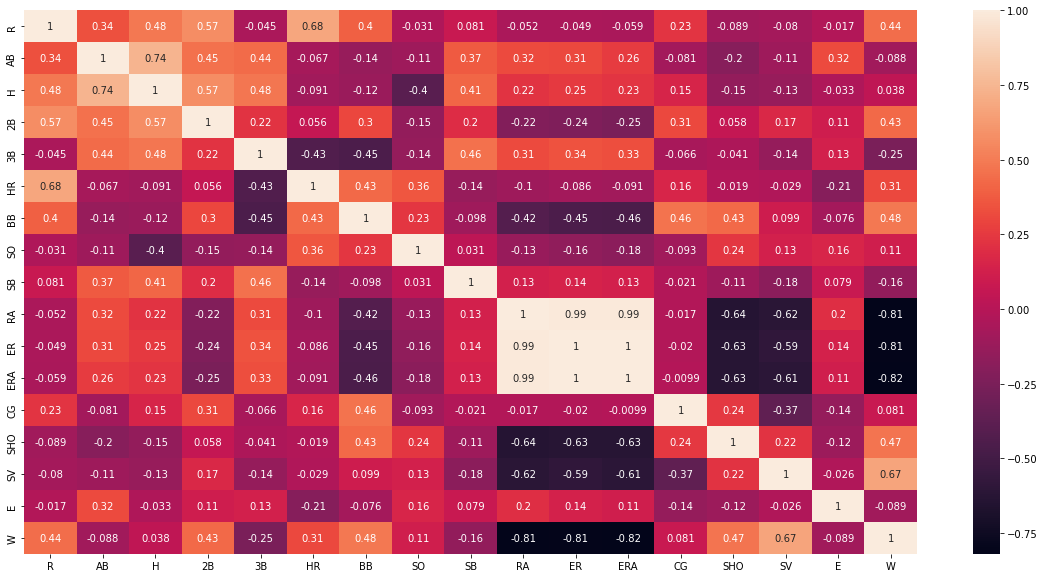

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We will drop the columns RA (Runs Allowed) and ER (Earned Runs) because ERA (Earned Run Average) contains the values associated with these columns.

In [38]:
df.drop(['ER', 'RA'], axis=1, inplace = True)

In [39]:
df.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E,W
0,6.584791,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88,95
1,6.545350,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86,83
2,6.505784,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79,81
3,6.432940,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101,76
4,6.535241,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86,74


Those columns have been removed

In [40]:
vif_calc()

,variables,VIF FACTOR
0,R,16812.075860
1,AB,18702.608128
2,H,3292.535418
3,2B,765.339551
4,3B,28.962715
5,HR,78.560496
6,BB,200.258240
7,SO,308.354349
8,SB,25.810871
9,ERA,688.960665


We can see that the values have reduced.

<AxesSubplot:>

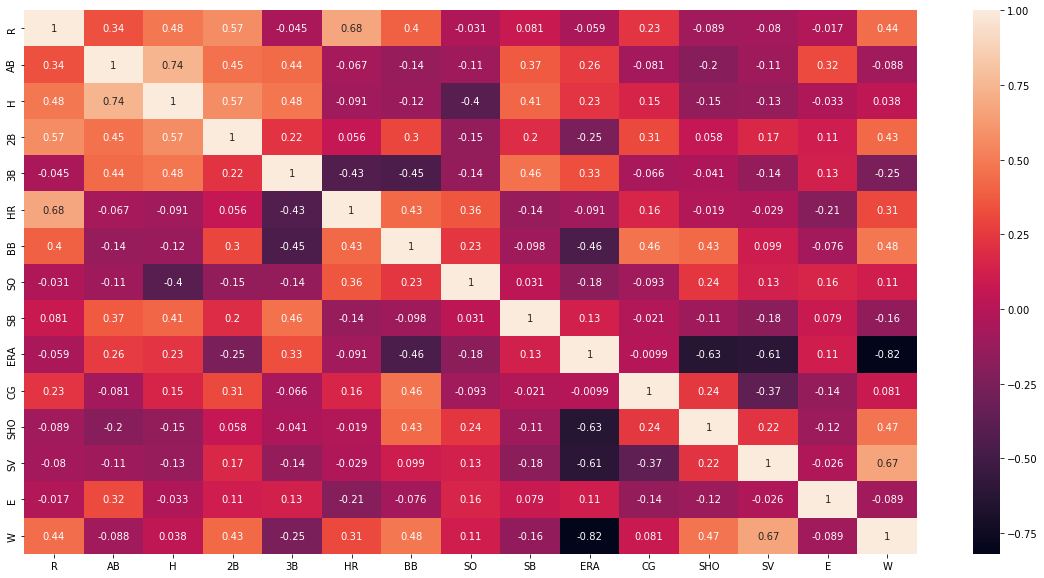

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Observation: The very highly correlated values are gone.

## Dealing with outliers

R         AxesSubplot(0.125,0.772143;0.227941x0.107857)
AB     AxesSubplot(0.398529,0.772143;0.227941x0.107857)
H      AxesSubplot(0.672059,0.772143;0.227941x0.107857)
2B        AxesSubplot(0.125,0.642714;0.227941x0.107857)
3B     AxesSubplot(0.398529,0.642714;0.227941x0.107857)
HR     AxesSubplot(0.672059,0.642714;0.227941x0.107857)
BB        AxesSubplot(0.125,0.513286;0.227941x0.107857)
SO     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
SB     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
ERA       AxesSubplot(0.125,0.383857;0.227941x0.107857)
CG     AxesSubplot(0.398529,0.383857;0.227941x0.107857)
SHO    AxesSubplot(0.672059,0.383857;0.227941x0.107857)
SV        AxesSubplot(0.125,0.254429;0.227941x0.107857)
E      AxesSubplot(0.398529,0.254429;0.227941x0.107857)
W      AxesSubplot(0.672059,0.254429;0.227941x0.107857)
dtype: object

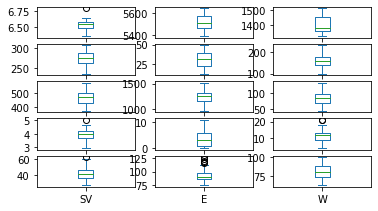

In [43]:
df.plot(kind='box', subplots=True, layout=(6, 3))

In [44]:
z = np.abs(zscore(df))

print(np.where(z > 3))

(array([5], dtype=int64), array([0], dtype=int64))


These are points where the zscore is greater than 3.

In [45]:
df.shape

(30, 15)

In [46]:
len(np.where(z > 3)[0])

1

In [47]:
df = df[(z<3).all(axis=1)]

In [48]:
df.shape

(29, 15)

Only 1 row removed, so we kept most of the data in tact.

## Splitting data for training and testing

In [49]:
x = df.iloc[:,0:-1]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,6.584791,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,6.545350,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,6.505784,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,6.432940,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,6.535241,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,6.638568,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,6.569481,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,6.467699,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,6.617403,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,6.621406,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


In [50]:
y = df.iloc[:,-1]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

#### Models

In [51]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [52]:
models = [lr, ridge, lasso, en, knn, svr, dtr, rf]

#### Finding best random state

In [53]:
best_random_state = 0
lowest_error = 100
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 56.54591100451504
At random score 1, mean squared error is 34.98573229558152
At random score 2, mean squared error is 52.33554117882272
At random score 3, mean squared error is 17.3970144837587
At random score 4, mean squared error is 16.089602729214732
At random score 5, mean squared error is 47.64924295507231
At random score 6, mean squared error is 11.066947618647816
At random score 7, mean squared error is 16.725203190890188
At random score 8, mean squared error is 52.911965444855525
At random score 9, mean squared error is 40.39172656480994
At random score 10, mean squared error is 30.647233579112378
At random score 11, mean squared error is 31.83969512243255
At random score 12, mean squared error is 32.297667618327395
At random score 13, mean squared error is 14.520207357322922
At random score 14, mean squared error is 11.731838587019794
At random score 15, mean squared error is 9.881020740124441
At random score 16, mean squared error is 4

#### We will proceed with random state 47

In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=47)

In [55]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of -155.20253418761283% and a mean squared error of 4.08
Model Ridge() had training score of -221.23440272885787% and a mean squared error of 69.69
Model Lasso() had training score of -204.50713147337098% and a mean squared error of 98.68
Model ElasticNet() had training score of -206.57153013107384% and a mean squared error of 105.17
Model KNeighborsRegressor() had training score of -104.67889558436787% and a mean squared error of 115.48
Model SVR() had training score of -107.22452549321501% and a mean squared error of 129.31
Model DecisionTreeRegressor() had training score of -126.57935550228902% and a mean squared error of 31.5
Model RandomForestRegressor() had training score of -17.082373781009412% and a mean squared error of 40.79


#### We will proceed with random forest regressor

In [56]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [57]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [58]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'squared_error',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
rf = RandomForestRegressor(criterion='squared_error', min_samples_leaf=2, min_samples_split=2, n_estimators=200)

In [60]:
cross_val_score(rf, xtrain,ytrain,cv=5)

array([-2.16200191,  0.70571313,  0.32617603,  0.47117154, -0.1440977 ])

In [61]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: -14.991288787434526


In [62]:
print(f'The mean squared error is {mean_squared_error(ytest, pred)}')

The mean squared error is 35.561008139222025


In [63]:
print(f'The r2 score is {r2_score(ytest, pred)}')

The r2 score is 0.7182666608688396


### Conclusion: Random Forest Regressor is the best model with cross val score of -14.99, r2 score of 71.83% and with mse of 35.56

## Saving the best model

In [64]:
import pickle
filename = 'baseball.pkl'
pickle.dump(rf, open(filename, 'wb'))

Loading it back and checking score

In [66]:
model = pickle.load(open('baseball.pkl', 'rb'))
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
r2_score(ytest,pred)*100

71.44768252692415